In [1]:
import pandas as  pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('Loan_Approvel Project.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)


In [9]:
df["Loan_Status"] = df["Loan_Status"].map({"N": 0, "Y": 1})

In [10]:
df['Total_Income']  = df['ApplicantIncome'] + df['CoapplicantIncome'] 

In [11]:
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term'] 

In [12]:
df['LoanAmount_log'] = np.log1p(df['LoanAmount'])
df['Total_Income_log'] = np.log1p(df['Total_Income'])

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,LoanAmount_log,Total_Income_log
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0,NaN,NaN,8.674197
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,0.355556,4.859812,8.714732
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,0.183333,4.204693,8.006701
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,0.333333,4.795791,8.505525
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,0.391667,4.955827,8.699681


In [14]:
df.drop(columns=['Loan_ID'],axis=1,inplace=True)

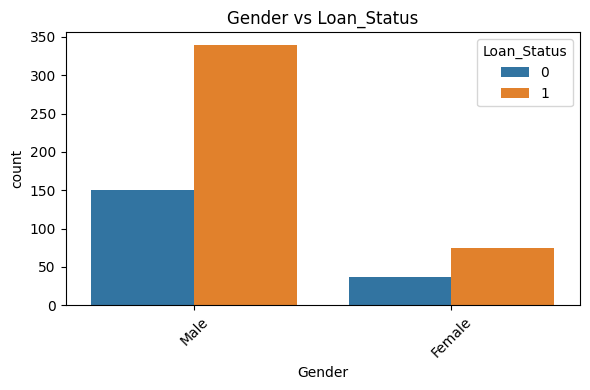

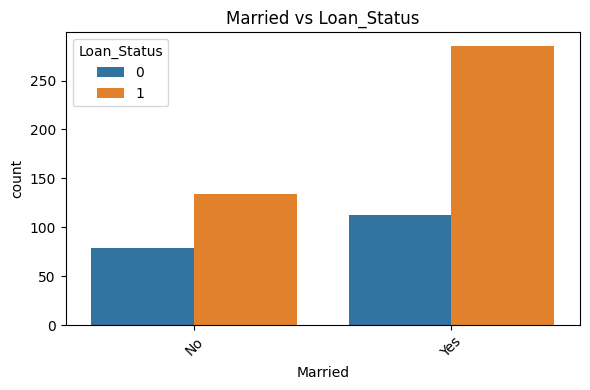

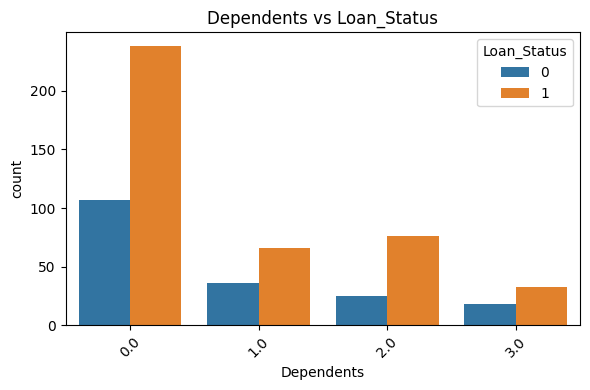

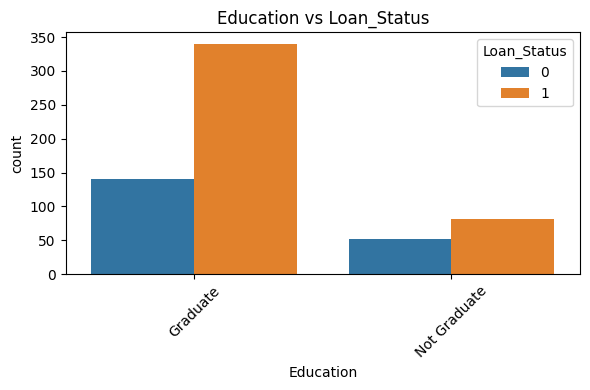

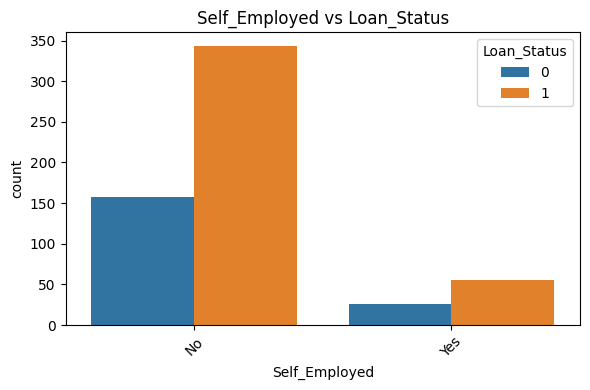

In [15]:
def categorical_countplots(df, categorical_cols, hue_col, figsize=(6,4)):
    
    
    for col in categorical_cols:
        plt.figure(figsize=figsize)
        sns.countplot(data=df, x=col, hue=hue_col)
        plt.title(f"{col} vs {hue_col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


categorical_columns = [
    'Gender',
    'Married',
    'Dependents',
    'Education',
    'Self_Employed'
]

categorical_countplots(
    df=df,
    categorical_cols=categorical_columns,
    hue_col='Loan_Status'
)

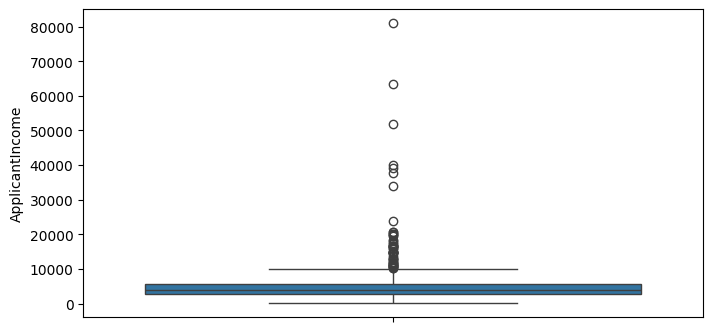

In [16]:
plt.figure(figsize=(8,4)) 
sns.boxplot(y=df['ApplicantIncome'])
plt.show()

In [17]:
df['ApplicantIncome'].describe(percentiles=(0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99))

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
1%        1025.000000
5%        1897.550000
10%       2216.100000
25%       2877.500000
50%       3812.500000
75%       5795.000000
90%       9459.900000
95%      14583.000000
99%      32540.410000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [18]:
Q1=df['ApplicantIncome'].quantile(0.01)
Q3=df['ApplicantIncome'].quantile(0.99)
df=df[df['ApplicantIncome']<=Q3]
df=df[df['ApplicantIncome']>=Q1]

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

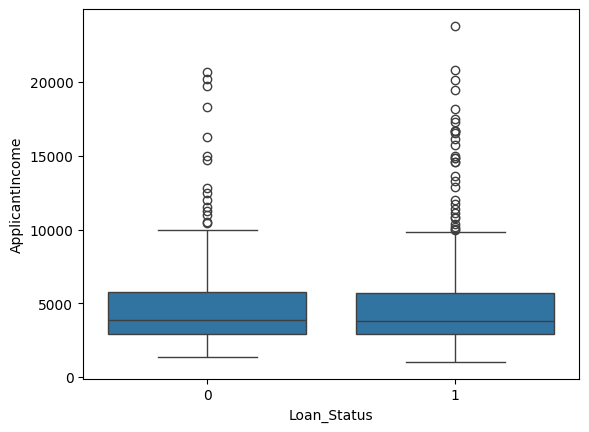

In [19]:
sns.boxplot(y=df['ApplicantIncome'],x=df['Loan_Status'])

<Axes: ylabel='CoapplicantIncome'>

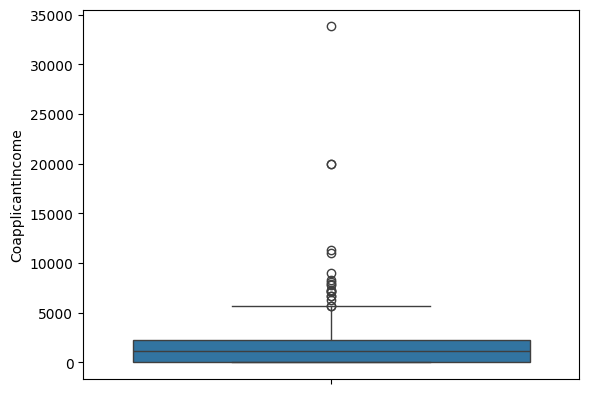

In [20]:
sns.boxplot(y=df['CoapplicantIncome'])


In [21]:
df['CoapplicantIncome'].describe(percentiles=(0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99))

count      601.000000
mean      1551.264426
std       2447.952413
min          0.000000
1%           0.000000
5%           0.000000
10%          0.000000
25%          0.000000
50%       1167.000000
75%       2254.000000
90%       3750.000000
95%       4983.000000
99%       8333.000000
max      33837.000000
Name: CoapplicantIncome, dtype: float64

In [22]:
Q1=df['CoapplicantIncome'].quantile(0.01)
Q3=df['CoapplicantIncome'].quantile(0.99)
df=df[df['CoapplicantIncome']<=Q3]
df=df[df['CoapplicantIncome']>=Q1]

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

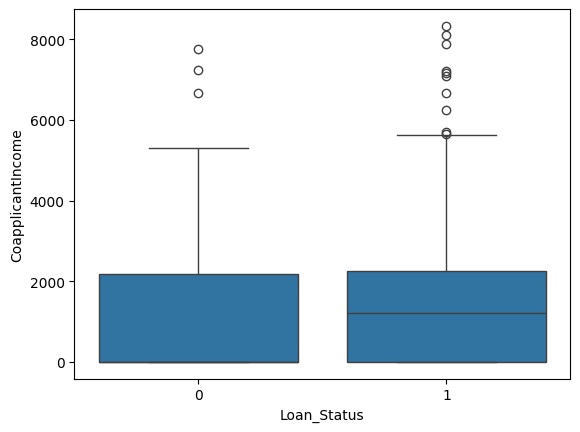

In [23]:
sns.boxplot(y=df['CoapplicantIncome'],x=df['Loan_Status'])


<Axes: ylabel='LoanAmount'>

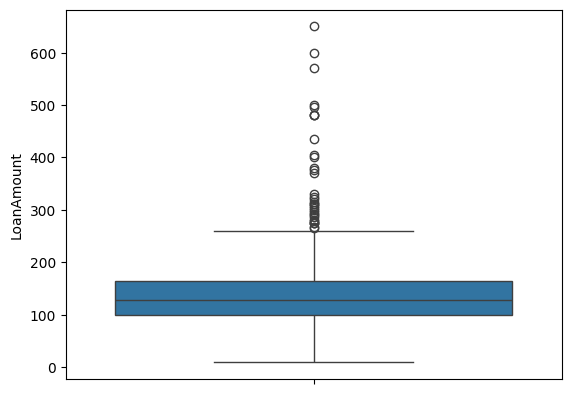

In [24]:
sns.boxplot(y=df['LoanAmount'])


In [25]:
df['LoanAmount'].describe(percentiles=(0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99))

count    573.000000
mean     142.420593
std       77.182008
min        9.000000
1%        30.000000
5%        55.600000
10%       71.000000
25%      100.000000
50%      127.000000
75%      165.000000
90%      217.600000
95%      276.600000
99%      480.000000
max      650.000000
Name: LoanAmount, dtype: float64

In [26]:
Q1=df['LoanAmount'].quantile(0.01)
Q3=df['LoanAmount'].quantile(0.99)
df=df[df['LoanAmount']<=Q3]
df=df[df['LoanAmount']>=Q1]

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

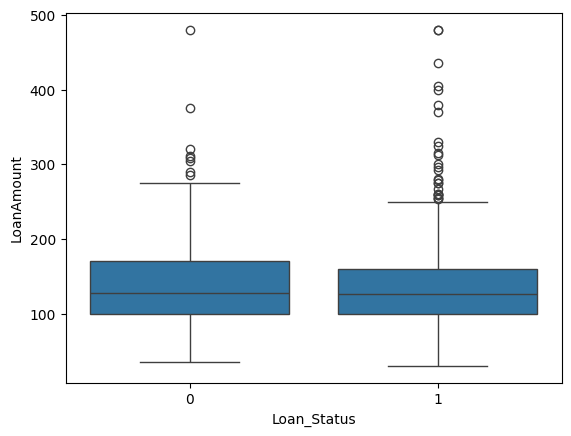

In [27]:
sns.boxplot(y=df['LoanAmount'],x=df['Loan_Status'])


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

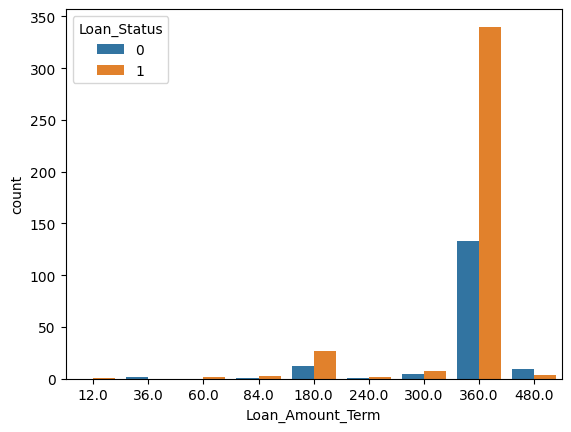

In [28]:
sns.countplot(x=df['Loan_Amount_Term'],hue=df['Loan_Status'])


<Axes: xlabel='Property_Area', ylabel='count'>

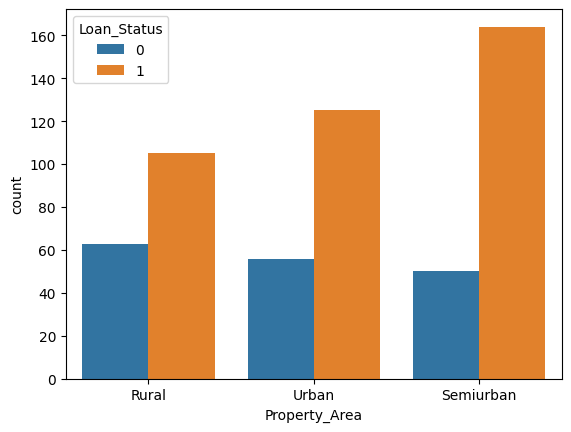

In [29]:
sns.countplot(df,x='Property_Area',hue='Loan_Status') 

<Axes: xlabel='Credit_History', ylabel='count'>

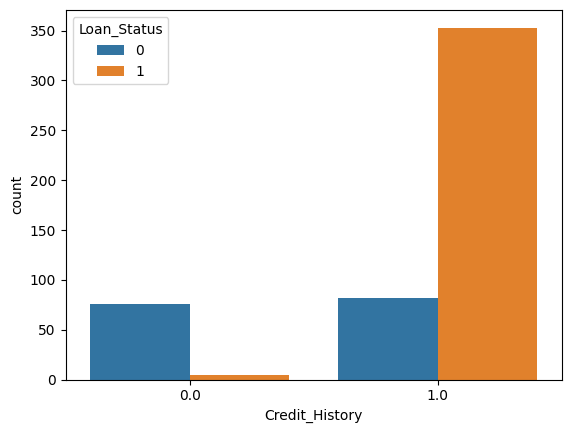

In [30]:
sns.countplot(df,x='Credit_History',hue='Loan_Status')

In [31]:
df.drop(columns=['Total_Income'],axis=1,inplace=True) 


In [32]:
df.drop(columns=['LoanAmount'],axis=1,inplace=True)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.drop(columns=['Loan_Status']) 
y = df['Loan_Status'] 

In [35]:
import evalml
X_train,X_test,y_train,y_test = evalml.preprocessing.split_data(X,y,problem_type='binary')

C:\Users\hp\evalml_project\venv_evalml\lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\hp\evalml_project\venv_evalml\lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\hp\evalml_project\venv_evalml\lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\hp\evalml_project\venv_evalml\lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so ea

In [36]:
from evalml.automl import AutoMLSearch 
automl = AutoMLSearch(X_train=X_train,y_train=y_train,problem_type='binary')
automl.search() 

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + One Hot Encoder + RF Classifier Select From Model': 4.028247356414795,
  'Total time of batch': 4.17262864112854},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + One Hot Encoder + Select Columns Transformer': 2.57334303855896,
  'Extra Trees Classifier w/ Label Encoder + Imputer + One Hot Encoder + Select Columns Transformer': 3.3538784980773926,
  'Elastic Net Classifier w/ Label Encoder + Imputer + One Hot Encoder + Standard Scaler + Select Columns Transformer': 3.1666266918182373,
  'XGBoost Classifier w/ Label Encoder + Imputer + One Hot Encoder + Select Columns Transformer': 2.110114812850952,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + One Hot Encoder + Standard Scaler + Select Columns Transformer': 7.655520915985107,
  'Total time of batch': 19.6029851436615}}

In [37]:
automl.rankings


,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.459796,0.459796,2.671333e-02,95.747790,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,3,Extra Trees Classifier w/ Label Encoder + Impu...,3,0.464387,0.464387,2.974499e-02,95.705332,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,4,Elastic Net Classifier w/ Label Encoder + Impu...,4,0.495865,0.495865,7.193543e-02,95.414220,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,6,Logistic Regression Classifier w/ Label Encode...,6,0.497801,0.497801,7.237870e-02,95.396311,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,5,XGBoost Classifier w/ Label Encoder + Imputer ...,5,0.504664,0.504664,6.296909e-02,95.332845,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,2,LightGBM Classifier w/ Label Encoder + Imputer...,2,0.527637,0.527637,7.079905e-02,95.120390,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Binary Classification Pipeline,0,10.813096,10.813096,1.256074e-15,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [39]:
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score


In [40]:
numerical_columns = ['Dependents','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','EMI','LoanAmount_log','Total_Income_log'] 
categorical_columns = ['Gender','Married','Education','Self_Employed','Property_Area','Credit_History'] 

In [41]:
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler()) 
 
])

cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')), 
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
]) 

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric',num_pipeline,numerical_columns), 
        ('categorical',cat_pipeline,categorical_columns)
    ]
)

                        

In [42]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())  
])

In [43]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42, n_jobs=-1)],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 5, 10],
        'classifier__min_samples_leaf': [1, 5],
        'classifier__class_weight': [None, 'balanced']
    },
    {
        'classifier': [LogisticRegression(penalty='elasticnet', solver='saga', max_iter=5000)],
        'classifier__C': np.logspace(-3, 2, 6),
        'classifier__l1_ratio': [0.2, 0.5, 0.8],
        'classifier__class_weight': [None, 'balanced']
    }
]

In [44]:
for col in categorical_columns:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)



In [ ]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='neg_log_loss',   
    cv=5,
    n_jobs=-1,
    verbose=2
)

search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
print("Best model:", search.best_estimator_)


In [ ]:
print("Best params:", search.best_params_)


In [ ]:
print("Best log loss:", -search.best_score_)


In [ ]:
y_pred = search.predict(X_test)
y_pred_proba = search.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, f1_score, log_loss, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_pred_proba))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

In [ ]:
sample = {
    'Gender': ['Male'],
    'Married': ['Yes'],
    'Dependents': [3],
    'Education': ['Graduate'],
    'Self_Employed': ['Yes'],
    'ApplicantIncome': [500],
    'CoapplicantIncome': [500],
    'Loan_Amount_Term': [360],
    'Credit_History': [0],
    'Property_Area': ['Rural'],
    'EMI': [5000 / 360],
    'LoanAmount_log': [np.log1p(300)],
    'Total_Income_log': [np.log1p(500 + 500)]
}

sample_df = pd.DataFrame(sample)

pred_class = search.predict(sample_df)
pred_proba = search.predict_proba(sample_df)[:, 1]

print("Predicted class:", pred_class[0])
print("Predicted probability of approval:", pred_proba[0])


In [ ]:
import pickle


In [ ]:
# Save the model to a file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(search, file)


In [ ]:
df.head()